In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [72]:
df = pd.read_csv('mex_clean.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,México DF Taxi Libre,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461
2,3,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530,N,681,2848,129
3,4,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256,N,436,1409,106
4,5,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754,N,442,1567,85
...,...,...,...,...,...,...,...,...,...,...,...,...
12689,12690,México DF Radio Taxi,2016-10-27 09:10:05,2016-10-27 10:14:10,-99.180762,19.369210,-99.180013,19.370270,N,3846,8261,427
12690,12691,México DF Taxi de Sitio,2016-10-27 10:53:15,2016-10-27 11:01:53,-99.059582,19.307219,-99.065798,19.306472,N,518,2498,115
12691,12692,México DF Taxi Libre,2016-10-27 11:19:44,2016-10-27 11:38:35,-99.170637,19.283637,-99.178194,19.280982,N,1131,6051,228
12692,12693,México DF Taxi de Sitio,2016-10-28 06:49:41,2016-10-28 06:51:25,-99.194384,19.396768,-99.194622,19.396717,N,104,49,96


In [73]:
df.shape

(12694, 12)

In [74]:
df.describe()

,id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_meters,wait_sec
count,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,1.269400e+04,12694.000000,1.269400e+04
mean,6347.500000,-99.136155,19.385067,-99.133728,19.386764,2.298377e+04,6666.431700,1.161270e+06
std,3664.586493,0.430001,0.129518,0.429582,0.131199,2.293364e+05,11386.891512,5.799612e+07
min,1.000000,-108.985069,18.829117,-108.987429,18.829103,2.000000e+00,21.000000,0.000000e+00
25%,3174.250000,-99.195615,19.325832,-99.192102,19.325325,4.840000e+02,1775.000000,8.900000e+01
50%,6347.500000,-99.164436,19.371382,-99.160705,19.374913,1.033500e+03,3948.000000,2.340000e+02
75%,9520.750000,-99.107092,19.432106,-99.107355,19.434360,2.368750e+03,8265.000000,5.910000e+02
max,12694.000000,-86.871347,25.752964,-86.871002,25.781058,1.657095e+07,802537.000000,4.429346e+09


In [75]:
df.dtypes

id                      int64
vendor_id              object
pickup_datetime        object
dropoff_datetime       object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dist_meters             int64
wait_sec                int64
dtype: object

In [76]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dist_meters           0
wait_sec              0
dtype: int64

In [77]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,México DF Taxi de Sitio,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,México DF Taxi Libre,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461
2,3,México DF Taxi Libre,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530,N,681,2848,129
3,4,México DF Taxi Libre,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256,N,436,1409,106
4,5,México DF Taxi Libre,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754,N,442,1567,85


In [78]:
app_df = df[['pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
app_df.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353
1,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538
2,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530
3,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256
4,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754


In [79]:
app_df

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353
1,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538
2,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530
3,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256
4,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754
...,...,...,...,...,...,...
12689,2016-10-27 09:10:05,2016-10-27 10:14:10,-99.180762,19.369210,-99.180013,19.370270
12690,2016-10-27 10:53:15,2016-10-27 11:01:53,-99.059582,19.307219,-99.065798,19.306472
12691,2016-10-27 11:19:44,2016-10-27 11:38:35,-99.170637,19.283637,-99.178194,19.280982
12692,2016-10-28 06:49:41,2016-10-28 06:51:25,-99.194384,19.396768,-99.194622,19.396717


In [80]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import geopandas as gpd
from shapely.geometry import Point

In [82]:
shape_df = gpd.read_file('/content/gis/gis_osm_transport_free_1.shp')

In [83]:
#Pickup Coordinates Mapping
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(app_df['pickup_longitude'], app_df['pickup_latitude'])]
geo_df = gpd.GeoDataFrame(app_df, crs=loc_crs, geometry=loc_geom)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


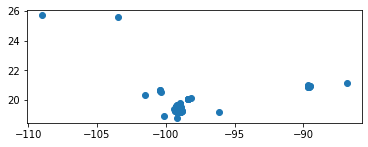

In [84]:
geo_df.plot()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


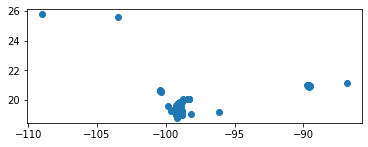

In [85]:
#Dropoff Coordinates
loc_crs1 = {'init': 'epsg:4326'}
loc_geom1 = [Point(xy) for xy in zip(app_df['dropoff_longitude'], app_df['dropoff_latitude'])]
geo_df1 = gpd.GeoDataFrame(app_df, crs=loc_crs1, geometry=loc_geom1)
geo_df1.plot()

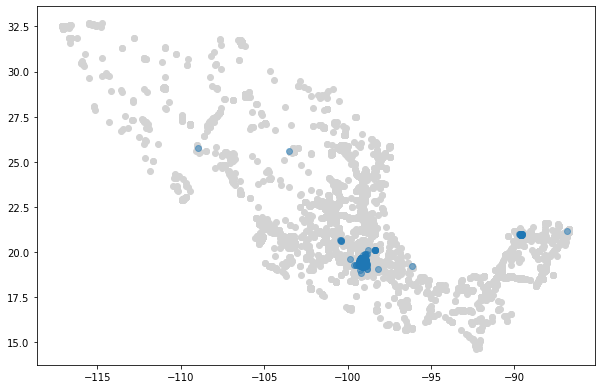

In [86]:
#Pickup Layoff Transport Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df.plot(ax=ax, alpha=0.5, zorder=2)

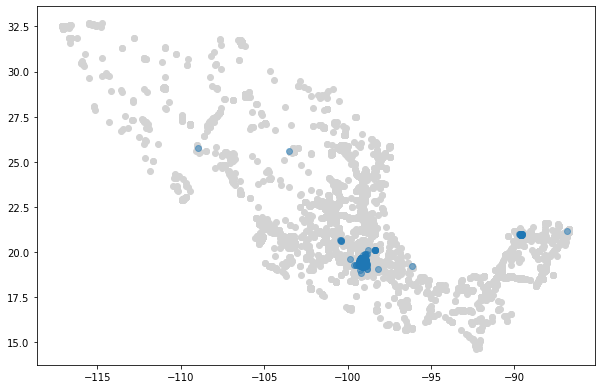

In [87]:
#Dropoff Layoff Transport Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df1.plot(ax=ax, alpha=0.5, zorder=2)

In [88]:
shape_df1 = gpd.read_file('/content/gis/gis_osm_traffic_free_1.shp')

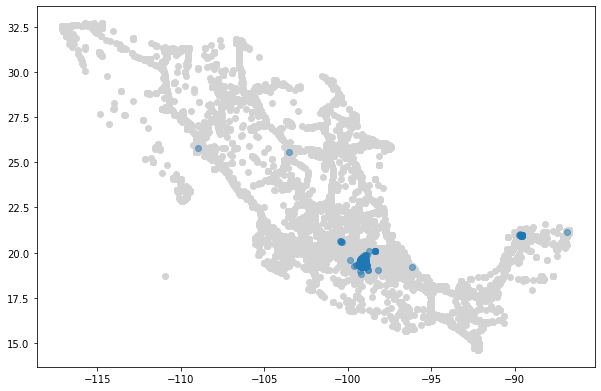

In [89]:
#Pickup Layoff Traffic Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df1.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df.plot(ax=ax, alpha=0.5, zorder=2)

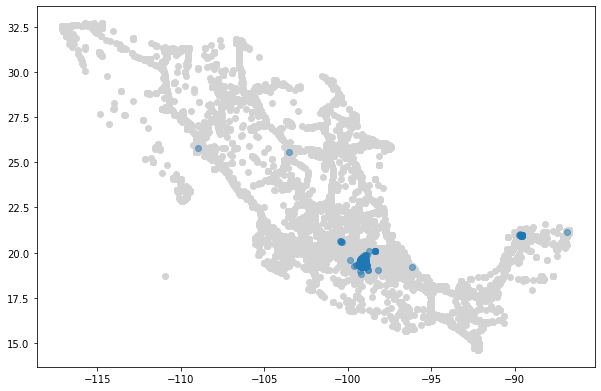

In [90]:
#Dropoff Layoff Traffic Mapping

fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
shape_df1.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df1.plot(ax=ax, alpha=0.5, zorder=2)

In [91]:
# Label Encoder
le = LabelEncoder()

df['vendor_id']= le.fit_transform(df['vendor_id'])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,2,2016-09-16 07:14:12,2016-09-18 04:41:40,-99.097369,19.416874,-99.202729,19.430353,N,120449,12373,242
1,2,1,2016-09-18 06:16:33,2016-09-18 10:11:43,-99.297148,19.322128,-99.289949,19.326538,N,14110,1700,461
2,3,1,2016-09-18 10:11:50,2016-09-18 10:23:11,-99.289603,19.326263,-99.271874,19.328530,N,681,2848,129
3,4,1,2016-09-18 10:23:38,2016-09-18 10:30:53,-99.271161,19.328875,-99.279900,19.326256,N,436,1409,106
4,5,1,2016-09-18 10:44:18,2016-09-18 10:51:40,-99.282761,19.326944,-99.291705,19.322754,N,442,1567,85


In [92]:
df = df.drop(columns=['id','pickup_datetime','dropoff_datetime'])


In [93]:
X = df.iloc[:,:-4]
y = df.iloc[:,-2]

In [94]:
y

0        12373
1         1700
2         2848
3         1409
4         1567
         ...  
12689     8261
12690     2498
12691     6051
12692       49
12693     3448
Name: dist_meters, Length: 12694, dtype: int64

In [95]:
#Clustering data with tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def k_means_clustering( a1, b1, c1, d1, clusters, steps=100):
    vec_vals = []
    for i in range(len(a1)):
        a = a1[i]
        b = b1[i]
        c = c1[i]
        d = d1[i]
        vec_vals.append([a, b, c, d])
    v_vals = np.array(vec_vals)
    np.random.shuffle(v_vals)    
    
    sess = tf.compat.v1.Session()
    k = clusters
    points = v_vals
    data = tf.constant(points)
    
    # random initial centroids (points shuffled above)
    centroids = tf.Variable(data[:k, :])

    # add k dim to data and n dim to centroids to make matrices compatible
    # for array operations instead of loops
    data_expanded = tf.expand_dims(data, 0)
    centroids_expanded = tf.expand_dims(centroids, 1)

    # computes squared Euclidean distance between every point and every centroid
    # and get closest centroid for each point
    allocations = tf.argmin(tf.reduce_sum(tf.square(data_expanded - centroids_expanded), 2), 0)

    sess.run(tf.global_variables_initializer())
    c = 0 # index of centroid
    tf.equal(allocations, c)
    tf.gather(data, tf.where(tf.equal(allocations, c)))

    means = tf.concat(
        [tf.reduce_mean(
            tf.gather(data,
                      tf.where(tf.equal(allocations, c))), 0) for c in range(k)], 0)

    update_centroids = tf.assign(centroids, means)

    for step in range(steps):
        _, centroid_values, allocation_values = sess.run([update_centroids, centroids, allocations])
        
    clusters_df = pd.DataFrame({a1.name: points[:,0], b1.name: points[:,1], c1.name: points[:,2], d1.name: points[:,3],"cluster": allocation_values})
    # sns.lmplot(a1.name, b1.name, c1.name, d1.name, data=clusters_df, fit_reg=False, size=6, hue="cluster")
    # plt.show()
    print(clusters_df)
    clusters_df.to_csv("ClusteringResult.csv", index=False)
    
Cluster_tf = k_means_clustering(app_df['pickup_latitude'], app_df['pickup_longitude'], app_df['dropoff_latitude'], app_df['dropoff_longitude'], 2)

Cluster_tf

       pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0            19.432923        -99.148060         19.429543         -99.163015   
1            19.241147        -99.090431         19.252086         -99.094106   
2            19.359329        -99.061938         19.346793         -99.064411   
3            19.307774        -99.060724         19.307451         -99.060295   
4            19.379618        -99.189200         19.369768         -99.179578   
...                ...               ...               ...                ...   
12689        19.412221        -99.157883         19.428662         -99.181583   
12690        19.371373        -99.186001         19.371449         -99.178776   
12691        19.356406        -99.177935         19.348170         -99.180542   
12692        19.302307        -99.189487         19.302200         -99.189582   
12693        19.383913        -99.174218         19.367152         -99.179299   

       cluster  
0         

In [96]:
#Split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [97]:
len(y_train), len(y_test)

(10155, 2539)

In [98]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
label_scaler = StandardScaler()

# Fit and Transform both training and testing data
X_train = feature_scaler.fit_transform(X_train.values)
X_test = feature_scaler.fit_transform(X_test.values)
y_train = label_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = label_scaler.fit_transform(y_test.values.reshape(-1, 1))

In [108]:
#Regression distance meter with Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
tf.random.set_seed(42)  #first we set random seed
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])
history = model.fit(epochs=100, x=X_train, y=y_train,
          validation_data=(X_test, y_test))

Train on 10155 samples, validate on 2539 samples
Epoch 1/100
10155/10155 [==============================] - 1s 101us/sample - loss: 0.4116 - mean_absolute_error: 0.4116 - val_loss: 0.5073 - val_mean_absolute_error: 0.5073
Epoch 2/100
   32/10155 [..............................] - ETA: 1s - loss: 0.4973 - mean_absolute_error: 0.4973

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


10155/10155 [==============================] - 1s 66us/sample - loss: 0.3998 - mean_absolute_error: 0.3998 - val_loss: 0.4979 - val_mean_absolute_error: 0.4979
Epoch 3/100
10155/10155 [==============================] - 1s 71us/sample - loss: 0.3932 - mean_absolute_error: 0.3932 - val_loss: 0.4884 - val_mean_absolute_error: 0.4884
Epoch 4/100
10155/10155 [==============================] - 1s 79us/sample - loss: 0.3866 - mean_absolute_error: 0.3866 - val_loss: 0.4798 - val_mean_absolute_error: 0.4798
Epoch 5/100
10155/10155 [==============================] - 1s 67us/sample - loss: 0.3814 - mean_absolute_error: 0.3814 - val_loss: 0.4689 - val_mean_absolute_error: 0.4689
Epoch 6/100
10155/10155 [==============================] - 1s 69us/sample - loss: 0.3732 - mean_absolute_error: 0.3732 - val_loss: 0.4566 - val_mean_absolute_error: 0.4566
Epoch 7/100
10155/10155 [==============================] - 1s 69us/sample - loss: 0.3616 - mean_absolute_error: 0.3616 - val_loss: 0.4450 - val_mean_abs

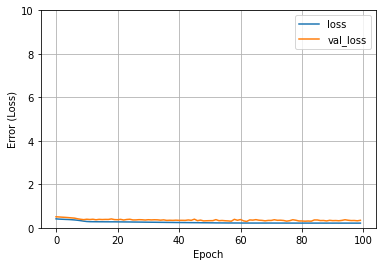

In [109]:
#Plot lost history
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [111]:
# Model evaluation on testing dataset
model.evaluate(X_train, y_train)

[0.2163441348565969, 0.21634407]